In [1]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import plotly.graph_objs as go
import plotly.offline as py

C:\Users\chris\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_excel('SORA.xlsx')
df.reset_index(drop=True, inplace=True)

In [3]:
df

,SORA Publication Date,SORA,EFFR
0,2005-07-04,1.7998,3.360
1,2005-07-05,1.7480,3.270
2,2005-07-06,1.7686,2.990
3,2005-07-07,1.7971,3.180
4,2005-07-08,1.7956,3.220
...,...,...,...
4828,2025-12-18,NaN,3.332
4829,2025-12-21,NaN,3.332
4830,2025-12-24,NaN,3.332
4831,2025-12-27,NaN,3.332


In [4]:
df.columns = ['ds','y','z']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y,z
4828,2025-12-18,NaN,3.332
4829,2025-12-21,NaN,3.332
4830,2025-12-24,NaN,3.332
4831,2025-12-27,NaN,3.332
4832,2025-12-30,NaN,3.332


<Axes: xlabel='ds'>

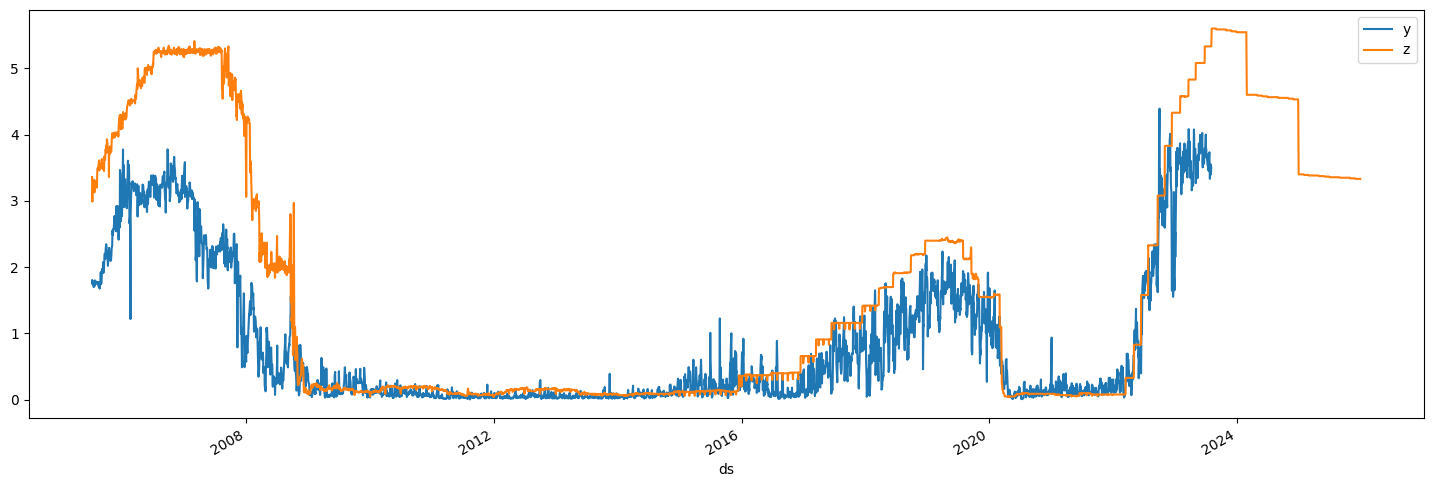

In [6]:
df.plot(x='ds',y=['y','z'],figsize=(18,6))

In [7]:
train = df.iloc[:len(df)-90]
test = df.iloc[len(df)-90:]

In [8]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)

09:48:07 - cmdstanpy - INFO - Chain [1] start processing
09:48:08 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4829,2025-12-21,4.244594,2.376053,5.554951,2.726787,5.679111,-0.243611,-0.243611,-0.243611,-0.220848,-0.220848,-0.220848,-0.022763,-0.022763,-0.022763,0.0,0.0,0.0,4.000983
4830,2025-12-24,4.250562,2.721119,5.881358,2.725538,5.691819,0.053973,0.053973,0.053973,0.079876,0.079876,0.079876,-0.025904,-0.025904,-0.025904,0.0,0.0,0.0,4.304535
4831,2025-12-27,4.256529,2.347269,5.606638,2.721663,5.704059,-0.245178,-0.245178,-0.245178,-0.220848,-0.220848,-0.220848,-0.024330,-0.024330,-0.024330,0.0,0.0,0.0,4.011351
4832,2025-12-30,4.262497,2.675900,5.835194,2.715746,5.716191,0.082459,0.082459,0.082459,0.101830,0.101830,0.101830,-0.019371,-0.019371,-0.019371,0.0,0.0,0.0,4.344956
4833,2025-12-31,4.264486,2.684356,5.952934,2.706952,5.724345,0.062609,0.062609,0.062609,0.079876,0.079876,0.079876,-0.017267,-0.017267,-0.017267,0.0,0.0,0.0,4.327095


In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2005-07-04,2.244262,1.590403,2.872185
1,2005-07-05,2.240852,1.592757,2.870613
2,2005-07-06,2.225404,1.570093,2.865812
3,2005-07-07,2.222544,1.501180,2.856135
4,2005-07-08,2.234875,1.619378,2.843018
...,...,...,...,...
4829,2025-12-21,4.000983,2.376053,5.554951
4830,2025-12-24,4.304535,2.721119,5.881358
4831,2025-12-27,4.011351,2.347269,5.606638
4832,2025-12-30,4.344956,2.675900,5.835194


In [11]:
test.tail()

,ds,y,z
4828,2025-12-18,NaN,3.332
4829,2025-12-21,NaN,3.332
4830,2025-12-24,NaN,3.332
4831,2025-12-27,NaN,3.332
4832,2025-12-30,NaN,3.332


In [15]:
#VECM
actual_chart = go.Scatter(x=df['ds'], y=df["y"], name= 'Actual')
predict_chart = go.Scatter(x=df['ds'], y=forecast["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(x=df['ds'], y=forecast["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(x=df['ds'], y=forecast["yhat_lower"], name= 'Predicted Lower')
effr = go.Scatter(x=df['ds'], y=df["z"], name= 'EFFR')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower, effr])

C:\Users\chris\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



'temp-plot.html'